In [20]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy
import matplotlib.pyplot as plt
from pathlib import Path
from read_data import get_network_df, get_corrs, get_full_df
from numba.core import types
import graph_tool
import numba

from numba import njit
from graph_tool.topology import shortest_distance
import pandas as pd
import networkx as nx
import graph_tool as gt
from graph_tool.topology import shortest_distance
import numpy as np
import typing

import numba
from numba.core import types

from transport_problem import OptimParams, DualOracle, HyperParams
from subgd import OracleStacker, ustm_mincost_mcf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
T_LEN = 76
LA_LEN = 25
MU_LEN = 25

In [22]:
net_df = get_network_df(Path('SiouxFalls') / 'SiouxFalls_net.tntp')
corrs = get_corrs(Path('SiouxFalls') / 'SiouxFalls_trips.tntp') 
corrs = corrs / corrs.sum()

graph = graph_tool.Graph(net_df.values, eprops=[('capacity', 'double'), ('fft', 'double')])
graph.ep.capacity.a = graph.ep.capacity.a / corrs.sum() 

# from graph_tool.draw import graph_draw
# graph_draw(graph)


In [23]:
from transport_problem import HyperParams, DualOracle, OptimParams 
l = np.sum(corrs, axis=1)
w = np.sum(corrs, axis=0)

zones_num = len(l)
sources = np.arange(zones_num)
targets = np.arange(zones_num)

params = HyperParams(gamma=10, mu_pow=0.25, rho=0.15)
oracle = DualOracle(graph, net_df, l, w, params)
oracle_stacker = OracleStacker(oracle, graph, sources, targets)

In [24]:
results = ustm_mincost_mcf(oracle_stacker,  eps_abs=1e-2, eps_cons_abs=1e-6, max_iter=600, stop_by_crit=False)

1
1
1
vars block grad:  39.01281840626232
t in optim params grad:  39.01281840626232 39.01281840626232
la in optim params grad:  0.0
mu in optim params grad:  0.0
norm T:  290.82297020696285
grad dF dla:  0.11352326852409254
grad dF dmu:  0.11333220509656691
start optimizing


  0%|          | 1/600 [00:00<01:34,  6.33it/s]

vars block grad:  39.01281840626232
t in optim params grad:  39.01281840626232 39.01281840626232
la in optim params grad:  0.0
mu in optim params grad:  0.0
norm T:  290.82297020696285
grad dF dla:  0.11352326852409254
grad dF dmu:  0.11333220509656691
count values below t_bar in new t:  0
vars block grad:  45.798847956876806
t in optim params grad:  45.55163842584414 45.55163842584414
la in optim params grad:  0.0
mu in optim params grad:  0.0
norm T:  375.474584559984
grad dF dla:  0.09200100598508118
grad dF dmu:  0.09194263907038362
norm (t - y):  10.001367001983313
norm t:  45.55163842584414
norm la:  3.3630901217370157
norm mu:  3.3574299294778367

vars block grad:  39.01281840626232
t in optim params grad:  39.01281840626232 39.01281840626232
la in optim params grad:  3.3630901217370157
mu in optim params grad:  3.3574299294778367
norm T:  290.82297020696285
grad dF dla:  0.11352326852409254
grad dF dmu:  0.11333220509656691
count values below t_bar in new t:  0
vars block grad:

  2%|▎         | 15/600 [00:00<00:13, 44.52it/s]

grad dF dla:  0.11349531674862853
grad dF dmu:  0.11330402603778672
norm (t - y):  0.002846400888621644
norm t:  39.013574048666634
norm la:  0.005745679188382211
norm mu:  0.005736005809369257

#######################################teta:  0.4348195546038235
vars block grad:  39.013558990207045
t in optim params grad:  39.0135577072745 39.0135577072745
la in optim params grad:  0.005745679188382211
mu in optim params grad:  0.005736005809369257
norm T:  290.83641908862876
grad dF dla:  0.11348879987044551
grad dF dmu:  0.1132974470156072
count values below t_bar in new t:  62
vars block grad:  39.01359055157129
t in optim params grad:  39.01358780302117 39.01358780302117
la in optim params grad:  0.007080685725934289
mu in optim params grad:  0.007068763460734364
norm T:  290.83327812761144
grad dF dla:  0.11347280037842178
grad dF dmu:  0.11328225417921903
norm (t - y):  0.005017634252347272
norm t:  39.01358780302117
norm la:  0.010363956231555567
norm mu:  0.01034649806184557

vars

  3%|▎         | 20/600 [00:00<00:12, 45.79it/s]

grad dF dla:  0.11268256936971133
grad dF dmu:  0.11249300312677778
norm (t - y):  0.00929420064956332
norm t:  39.01311189600658
norm la:  0.17269898207349632
norm mu:  0.17240854976473596

#######################################teta:  0.14731724077201386
vars block grad:  39.014147788772135
t in optim params grad:  39.01315587344108 39.01315587344108
la in optim params grad:  0.17269898207349632
mu in optim params grad:  0.17240854976473596
norm T:  290.8279309564374
grad dF dla:  0.11256461879020917
grad dF dmu:  0.11237454743789752
count values below t_bar in new t:  72
vars block grad:  39.014427387718754
t in optim params grad:  39.01329988401534 39.01329988401534
la in optim params grad:  0.19688413536779195
mu in optim params grad:  0.1965530869350579
norm T:  290.82695896157554
grad dF dla:  0.11250102442142514
grad dF dmu:  0.11231133995806775
norm (t - y):  0.0184949721756601
norm t:  39.01329988401534
norm la:  0.20991026876364183
norm mu:  0.20955722496578955

############

  5%|▌         | 31/600 [00:00<00:12, 45.08it/s]

count values below t_bar in new t:  72
vars block grad:  39.02410196523243
t in optim params grad:  39.01413305839137 39.01413305839137
la in optim params grad:  0.6178149504535482
mu in optim params grad:  0.6167709013197655
norm T:  290.83979327074536
grad dF dla:  0.11046332270605845
grad dF dmu:  0.1102759504532432
norm (t - y):  0.00973705958097888
norm t:  39.01413305839137
norm la:  0.6242081895158424
norm mu:  0.6231532966553152

vars block grad:  39.023339036145295
t in optim params grad:  39.01389916527711 39.01389916527711
la in optim params grad:  0.6242081895158424
mu in optim params grad:  0.6231532966553152
norm T:  290.831432233996
grad dF dla:  0.1105452749628677
grad dF dmu:  0.11035776374703504
count values below t_bar in new t:  72
vars block grad:  39.023560690482604
t in optim params grad:  39.014021196329026 39.014021196329026
la in optim params grad:  0.6074155522229192
mu in optim params grad:  0.6063891477004748
norm T:  290.8355120402177
grad dF dla:  0.11053

  7%|▋         | 44/600 [00:00<00:11, 50.32it/s]

norm (t - y):  0.01778345226549106
norm t:  39.01397938407563
norm la:  1.0651850114134462
norm mu:  1.063380451203572

vars block grad:  39.04104055634906
t in optim params grad:  39.01375811654782 39.01375811654782
la in optim params grad:  1.0651850114134462
mu in optim params grad:  1.063380451203572
norm T:  290.83484875882306
grad dF dla:  0.10842424825386053
grad dF dmu:  0.10823915452757242
count values below t_bar in new t:  73
vars block grad:  39.04149192546262
t in optim params grad:  39.01387722563268 39.01387722563268
la in optim params grad:  1.0327476507026088
mu in optim params grad:  1.0309983685534054
norm T:  290.83530412526477
grad dF dla:  0.10839315394546063
grad dF dmu:  0.1082077306567529
norm (t - y):  0.008898266994140437
norm t:  39.01387722563268
norm la:  1.0390211329860333
norm mu:  1.037261140904728

#######################################teta:  0.05703877481283833
vars block grad:  39.04554259746506
t in optim params grad:  39.01395699949435 39.01395699

  8%|▊         | 50/600 [00:01<00:11, 47.10it/s]

grad dF dla:  0.10461348439187788
grad dF dmu:  0.1044360635078107
norm (t - y):  0.017297382443964286
norm t:  39.01388087797651
norm la:  1.7814005218183149
norm mu:  1.7783746019537428

vars block grad:  39.091232595919244
t in optim params grad:  39.013585965110764 39.013585965110764
la in optim params grad:  1.7814005218183149
mu in optim params grad:  1.7783746019537428
norm T:  290.83271435168496
grad dF dla:  0.10481272823921804
grad dF dmu:  0.10463439949034431
count values below t_bar in new t:  72
vars block grad:  39.09184019966285
t in optim params grad:  39.01365293529108 39.01365293529108
la in optim params grad:  1.7428260740747485
mu in optim params grad:  1.739865881813061
norm T:  290.8336900498328
grad dF dla:  0.1047813713773346
grad dF dmu:  0.10460321790606275
norm (t - y):  0.008586081807100911
norm t:  39.01365293529108
norm la:  1.7488905359530498
norm mu:  1.7459200250538378

#######################################teta:  0.043504888430798805
vars block grad: 

 10%|█         | 63/600 [00:01<00:10, 50.90it/s]

count values below t_bar in new t:  73
vars block grad:  39.25833923865224
t in optim params grad:  39.014173411491335 39.014173411491335
la in optim params grad:  3.04852886857772
mu in optim params grad:  3.043350484445223
norm T:  290.8375506270289
grad dF dla:  0.09769156618230637
grad dF dmu:  0.09754157811574711
norm (t - y):  0.06485870866681709
norm t:  39.014173411491335
norm la:  3.093861391543548
norm mu:  3.0886072079661866

vars block grad:  39.240463217906395
t in optim params grad:  39.013408501698976 39.013408501698976
la in optim params grad:  3.093861391543548
mu in optim params grad:  3.0886072079661866
norm T:  290.8306449440768
grad dF dla:  0.09829283823090938
grad dF dmu:  0.09812832158532717
count values below t_bar in new t:  73
vars block grad:  39.24426053191342
t in optim params grad:  39.01374195113934 39.01374195113934
la in optim params grad:  2.9831291660409294
mu in optim params grad:  2.9780616202729675
norm T:  290.8336851506276
grad dF dla:  0.098168

 12%|█▏        | 69/600 [00:01<00:11, 46.22it/s]

count values below t_bar in new t:  73
vars block grad:  39.46149083078009
t in optim params grad:  39.01369702402569 39.01369702402569
la in optim params grad:  4.1925972273434144
mu in optim params grad:  4.185501487328883
norm T:  290.83213085413416
grad dF dla:  0.09166051984434206
grad dF dmu:  0.09151237258095736
norm (t - y):  0.0037625883517494072
norm t:  39.01369702402569
norm la:  4.195248821477854
norm mu:  4.1881488071891235

#######################################teta:  0.019377726888655526
vars block grad:  39.482898428317675
t in optim params grad:  39.01370909554574 39.01370909554574
la in optim params grad:  4.195248821477854
mu in optim params grad:  4.1881488071891235
norm T:  290.83220997906466
grad dF dla:  0.09110390791751613
grad dF dmu:  0.0909565050746621
count values below t_bar in new t:  74
vars block grad:  39.48400835256435
t in optim params grad:  39.01367327225588 39.01367327225588
la in optim params grad:  4.294888206176406
mu in optim params grad:  4.

 14%|█▎        | 81/600 [00:01<00:10, 48.19it/s]

count values below t_bar in new t:  72
vars block grad:  40.17082677353875
t in optim params grad:  39.01357719851373 39.01357719851373
la in optim params grad:  6.765664676329855
mu in optim params grad:  6.754412468700673
norm T:  290.83130660879715
grad dF dla:  0.07672851198317449
grad dF dmu:  0.07662028376504207
norm (t - y):  0.012644225875731364
norm t:  39.01357719851373
norm la:  6.774533794766722
norm mu:  6.763269158390143

vars block grad:  40.15188608236778
t in optim params grad:  39.01340417874653 39.01340417874653
la in optim params grad:  6.774533794766722
mu in optim params grad:  6.763269158390143
norm T:  290.82915104221763
grad dF dla:  0.0770626366341847
grad dF dmu:  0.0769539915158663
count values below t_bar in new t:  72
vars block grad:  40.1534080420212
t in optim params grad:  39.013439363403144 39.013439363403144
la in optim params grad:  6.7185685169203
mu in optim params grad:  6.707390509031791
norm T:  290.82966230846785
grad dF dla:  0.07703628302244

 16%|█▌        | 93/600 [00:02<00:10, 48.83it/s]

grad dF dla:  0.06146975102103703
grad dF dmu:  0.061409857047526085
count values below t_bar in new t:  73
vars block grad:  41.17193403361987
t in optim params grad:  39.01423065468488 39.01423065468488
la in optim params grad:  9.280333208117021
mu in optim params grad:  9.265371796837178
norm T:  290.83382214643194
grad dF dla:  0.06129998847839403
grad dF dmu:  0.06124168047275584
norm (t - y):  0.04045060800821014
norm t:  39.01423065468488
norm la:  9.308511216448572
norm mu:  9.293523412842065

vars block grad:  41.11444324978805
t in optim params grad:  39.013628265044126 39.013628265044126
la in optim params grad:  9.308511216448572
mu in optim params grad:  9.293523412842065
norm T:  290.83225807632175
grad dF dla:  0.062076585608558665
grad dF dmu:  0.06201464733989035
count values below t_bar in new t:  73
vars block grad:  41.121023244134584
t in optim params grad:  39.013865565784776 39.013865565784776
la in optim params grad:  9.181672365751837
mu in optim params grad: 

 16%|█▋        | 99/600 [00:02<00:10, 47.44it/s]

grad dF dla:  0.03794616991599183
grad dF dmu:  0.037950324043182555
count values below t_bar in new t:  73
vars block grad:  43.408252028462066
t in optim params grad:  39.01442004716761 39.01442004716761
la in optim params grad:  13.403317911932266
mu in optim params grad:  13.383927354018391
norm T:  290.8324804209972
grad dF dla:  0.0376463009048777
grad dF dmu:  0.03764952959508705
norm (t - y):  0.09979043868447586
norm t:  39.01442004716761
norm la:  13.466097529959407
norm mu:  13.446768751758487

vars block grad:  43.254522656579965
t in optim params grad:  39.01349252579065 39.01349252579065
la in optim params grad:  13.466097529959407
mu in optim params grad:  13.446768751758487
norm T:  290.8293057189916
grad dF dla:  0.038845679956460676
grad dF dmu:  0.03884843813597768
count values below t_bar in new t:  74
vars block grad:  43.2744102921573
t in optim params grad:  39.01349252579065 39.01349252579065
la in optim params grad:  13.217584589529608
mu in optim params grad: 

 18%|█▊        | 105/600 [00:02<00:10, 48.66it/s]

grad dF dla:  0.032574918013012745
grad dF dmu:  0.03258147615644574
norm (t - y):  0.005346803085020892
norm t:  39.01376449433212
norm la:  14.66570582609716
norm mu:  14.645722159760448

#######################################teta:  0.017891223605196967
vars block grad:  44.32443457282884
t in optim params grad:  39.01380721222241 39.01380721222241
la in optim params grad:  14.66570582609716
mu in optim params grad:  14.645722159760448
norm T:  290.830410230901
grad dF dla:  0.031799188030429776
grad dF dmu:  0.031804530968040666
count values below t_bar in new t:  74
vars block grad:  44.328212759066155
t in optim params grad:  39.0137408560784 39.0137408560784
la in optim params grad:  14.885822869838135
mu in optim params grad:  14.865753411661698
norm T:  290.83004705307343
grad dF dla:  0.03177273401206388
grad dF dmu:  0.031778256623309444


 18%|█▊        | 111/600 [00:02<00:09, 49.49it/s]

norm (t - y):  0.010421917553195327
norm t:  39.0137408560784
norm la:  14.891530604807265
norm mu:  14.87147561857542

#######################################teta:  0.024983939874207595
vars block grad:  44.53536553242502
t in optim params grad:  39.01370883257871 39.01370883257871
la in optim params grad:  14.891530604807265
mu in optim params grad:  14.87147561857542
norm T:  290.82980138473863
grad dF dla:  0.030783253307677123
grad dF dmu:  0.030786556316763126
count values below t_bar in new t:  74
vars block grad:  44.54257176586136
t in optim params grad:  39.01370883257871 39.01370883257871
la in optim params grad:  15.19772120390491
mu in optim params grad:  15.177568199216203
norm T:  290.82980138473863
grad dF dla:  0.030733019918141705
grad dF dmu:  0.030736434250367733
norm (t - y):  0.020152385312267585
norm t:  39.01370883257871
norm la:  15.208268420562467
norm mu:  15.188146506134375

#######################################teta:  0.034713942561954224
vars block grad: 

 20%|██        | 123/600 [00:02<00:09, 50.25it/s]

grad dF dla:  0.021752521385879037
grad dF dmu:  0.02173929461713237
count values below t_bar in new t:  74
vars block grad:  47.82304717703165
t in optim params grad:  39.014094866254645 39.014094866254645
la in optim params grad:  19.561080724285645
mu in optim params grad:  19.544710258887495
norm T:  290.827201792544
grad dF dla:  0.021605451301371658
grad dF dmu:  0.02159342655087114
norm (t - y):  0.028470572790130197
norm t:  39.014094866254645
norm la:  19.565041423405265
norm mu:  19.548744132652462

#######################################teta:  0.037897778134836364
vars block grad:  48.14493682538636
t in optim params grad:  39.014028259980115 39.014028259980115
la in optim params grad:  19.565041423405265
mu in optim params grad:  19.548744132652462
norm T:  290.8269809927289
grad dF dla:  0.020690910141681763
grad dF dmu:  0.02068523444839813
count values below t_bar in new t:  73
vars block grad:  48.151271099937006
t in optim params grad:  39.015220881665186 39.0152208816

 23%|██▎       | 136/600 [00:02<00:09, 50.89it/s]

grad dF dla:  0.013401978669151141
grad dF dmu:  0.01345215570183418
norm (t - y):  0.03552298528973441
norm t:  39.01428248100002
norm la:  21.756317361118484
norm mu:  21.74604838385809

#######################################teta:  0.04576578923632495
vars block grad:  50.03919794776124
t in optim params grad:  39.0141907351802 39.0141907351802
la in optim params grad:  21.756317361118484
mu in optim params grad:  21.74604838385809
norm T:  290.82737397695024
grad dF dla:  0.011971272426400609
grad dF dmu:  0.012029899804057335
count values below t_bar in new t:  74
vars block grad:  50.04498344037037
t in optim params grad:  39.0141907351802 39.0141907351802
la in optim params grad:  22.16088416118291
mu in optim params grad:  22.151963022017803
norm T:  290.82737397695024
grad dF dla:  0.011767478057044844
grad dF dmu:  0.011826015845607692
norm (t - y):  0.06284668619011356
norm t:  39.0141907351802
norm la:  22.167325909167072
norm mu:  22.15858639134487

#######################

 24%|██▎       | 142/600 [00:03<00:10, 45.49it/s]

count values below t_bar in new t:  72
vars block grad:  51.503175317909914
t in optim params grad:  39.01755610046425 39.01755610046425
la in optim params grad:  23.76989531909403
mu in optim params grad:  23.768402773699243
norm T:  290.88321964335466
grad dF dla:  0.009114249227570006
grad dF dmu:  0.009140759507199192
norm (t - y):  0.03703743865181325
norm t:  39.01755610046425
norm la:  23.772615040496607
norm mu:  23.771204384945325

vars block grad:  51.43904151434675
t in optim params grad:  39.01398541795777 39.01398541795777
la in optim params grad:  23.772615040496607
mu in optim params grad:  23.771204384945325
norm T:  290.82794805856327
grad dF dla:  0.009181230495961222
grad dF dmu:  0.009194354761237176
count values below t_bar in new t:  73
vars block grad:  51.44068343168898
t in optim params grad:  39.014444086196676 39.014444086196676
la in optim params grad:  23.706221162291772
mu in optim params grad:  23.704409124181424
norm T:  290.8371709998156
grad dF dla:  0

 26%|██▌       | 154/600 [00:03<00:08, 51.93it/s]

count values below t_bar in new t:  74
vars block grad:  51.74314012927676
t in optim params grad:  39.014283269177284 39.014283269177284
la in optim params grad:  24.03365982784221
mu in optim params grad:  24.033677209372044
norm T:  290.83284551200813
grad dF dla:  0.00919137256216298
grad dF dmu:  0.009188648532228482
norm (t - y):  0.0005830348222120072
norm t:  39.014283269177284
norm la:  24.033698812275063
norm mu:  24.03371741598067

#######################################teta:  0.004721989493860134
vars block grad:  51.776982212987136
t in optim params grad:  39.01427351890549 39.01427351890549
la in optim params grad:  24.033698812275063
mu in optim params grad:  24.03371741598067
norm T:  290.8327797837483
grad dF dla:  0.009201294051666073
grad dF dmu:  0.009196717402075949
count values below t_bar in new t:  74
vars block grad:  51.7770548649964
t in optim params grad:  39.01427351890549 39.01427351890549
la in optim params grad:  24.07001754988595
mu in optim params grad

 27%|██▋       | 160/600 [00:03<00:08, 49.60it/s]

count values below t_bar in new t:  72
vars block grad:  53.14763474028921
t in optim params grad:  39.01729732364578 39.01729732364578
la in optim params grad:  25.512264716178414
mu in optim params grad:  25.523120071523845
norm T:  290.8778890517613
grad dF dla:  0.00717001011562158
grad dF dmu:  0.00713836655428795
norm (t - y):  0.03291985907773604
norm t:  39.01729732364578
norm la:  25.512380616915387
norm mu:  25.523323124214475

vars block grad:  53.10136456415448
t in optim params grad:  39.013995904108796 39.013995904108796
la in optim params grad:  25.512380616915387
mu in optim params grad:  25.523323124214475
norm T:  290.8318210624689
grad dF dla:  0.007380641660969984
grad dF dmu:  0.007349866699203722
count values below t_bar in new t:  73
vars block grad:  53.10229502476123
t in optim params grad:  39.015093965669124 39.015093965669124
la in optim params grad:  25.46693937837051
mu in optim params grad:  25.477402553396722
norm T:  290.8500036240467
grad dF dla:  0.00

 28%|██▊       | 171/600 [00:03<00:09, 46.30it/s]

count values below t_bar in new t:  74
vars block grad:  53.60308024069799
t in optim params grad:  39.01434399263784 39.01434399263784
la in optim params grad:  25.98443065227763
mu in optim params grad:  26.000204300163347
norm T:  290.8358390625088
grad dF dla:  0.005531175204508226
grad dF dmu:  0.005509373350043575
norm (t - y):  0.0036739113085967837
norm t:  39.01434399263784
norm la:  25.98413011842721
norm mu:  25.999926078807896

#######################################teta:  0.015490997778433177
vars block grad:  53.69280491428826
t in optim params grad:  39.014310932797045 39.014310932797045
la in optim params grad:  25.98413011842721
mu in optim params grad:  25.999926078807896
norm T:  290.8355602020498
grad dF dla:  0.005232186672049633
grad dF dmu:  0.005212214586677136
count values below t_bar in new t:  74
vars block grad:  53.6921049787265
t in optim params grad:  39.014310932797045 39.014310932797045
la in optim params grad:  26.0760685469458
mu in optim params grad:

 31%|███       | 185/600 [00:03<00:08, 50.77it/s]

grad dF dla:  0.004283088412378753
grad dF dmu:  0.004269298458265425
norm (t - y):  0.0056159299702048405
norm t:  39.01448950161874
norm la:  26.493837898020296
norm mu:  26.516444400026266

#######################################teta:  0.02051678930185999
vars block grad:  54.20393576790797
t in optim params grad:  39.01444171025971 39.01444171025971
la in optim params grad:  26.493837898020296
mu in optim params grad:  26.516444400026266
norm T:  290.83728076621
grad dF dla:  0.004319420446844059
grad dF dmu:  0.00430511406847592
count values below t_bar in new t:  74
vars block grad:  54.20077740624225
t in optim params grad:  39.01444171025971 39.01444171025971
la in optim params grad:  26.595619323799074
mu in optim params grad:  26.61978631679462
norm T:  290.83728076621
grad dF dla:  0.004291117957996773
grad dF dmu:  0.004276858599744622
norm (t - y):  0.011291584796117016
norm t:  39.01444171025971
norm la:  26.592357627140647
norm mu:  26.61661370850965

###################

 32%|███▏      | 191/600 [00:04<00:08, 48.78it/s]

count values below t_bar in new t:  72
vars block grad:  54.8247082669924
t in optim params grad:  39.018179110325626 39.018179110325626
la in optim params grad:  27.21438215169064
mu in optim params grad:  27.256664842252544
norm T:  290.9476889147236
grad dF dla:  0.004657806039125856
grad dF dmu:  0.004645351674035091
norm (t - y):  0.05586948091581028
norm t:  39.018179110325626
norm la:  27.212370143101992
norm mu:  27.254673850005716

vars block grad:  54.81650300532207
t in optim params grad:  39.014120086248475 39.014120086248475
la in optim params grad:  27.212370143101992
mu in optim params grad:  27.254673850005716
norm T:  290.8344216671441
grad dF dla:  0.00465932709153158
grad dF dmu:  0.004646530505574673
count values below t_bar in new t:  72
vars block grad:  54.81689185659237
t in optim params grad:  39.01606943035287 39.01606943035287
la in optim params grad:  27.207195099221924
mu in optim params grad:  27.249146233618763
norm T:  290.8889893144656
grad dF dla:  0.0

 34%|███▎      | 202/600 [00:04<00:08, 46.02it/s]

#######################################teta:  0.005956759808765941
vars block grad:  54.90835226755558
t in optim params grad:  39.01413514945449 39.01413514945449
la in optim params grad:  27.290277409690606
mu in optim params grad:  27.337905419245285
norm T:  290.8358410365159
grad dF dla:  0.003940790865035236
grad dF dmu:  0.003930638105486144
count values below t_bar in new t:  73
vars block grad:  54.908005172592254
t in optim params grad:  39.01424035990095 39.01424035990095
la in optim params grad:  27.29645374749832
mu in optim params grad:  27.34461592505477
norm T:  290.83670849111604
grad dF dla:  0.003936003536972278
grad dF dmu:  0.00392622143766777
norm (t - y):  0.0031699298974544915
norm t:  39.01424035990095
norm la:  27.29602865086208
norm mu:  27.344193187304132

vars block grad:  54.90646923844406
t in optim params grad:  39.014127110861374 39.014127110861374
la in optim params grad:  27.29602865086208
mu in optim params grad:  27.344193187304132
norm T:  290.8357

 34%|███▍      | 207/600 [00:04<00:08, 45.27it/s]

count values below t_bar in new t:  74
vars block grad:  54.95007674491927
t in optim params grad:  39.01415572251651 39.01415572251651
la in optim params grad:  27.33549050367328
mu in optim params grad:  27.39057982467291
norm T:  290.8351017435521
grad dF dla:  0.0031615305445496476
grad dF dmu:  0.003146731085071996
norm (t - y):  0.0020675125836335222
norm t:  39.01415572251651
norm la:  27.33488605058226
norm mu:  27.389972474126957

#######################################teta:  0.011203899088101273
vars block grad:  54.95223565823433
t in optim params grad:  39.01413469941865 39.01413469941865
la in optim params grad:  27.33488605058226
mu in optim params grad:  27.389972474126957
norm T:  290.8349110368862
grad dF dla:  0.0031218122428945732
grad dF dmu:  0.0031060152045007446
count values below t_bar in new t:  73
vars block grad:  54.95334738155993
t in optim params grad:  39.01731119198438 39.01731119198438
la in optim params grad:  27.33662341875035
mu in optim params grad:

 37%|███▋      | 221/600 [00:04<00:07, 51.28it/s]

grad dF dla:  0.0030931915812831326
grad dF dmu:  0.0030763316309466884
count values below t_bar in new t:  74
vars block grad:  54.939876777647264
t in optim params grad:  39.01405808205954 39.01405808205954
la in optim params grad:  27.32215595495869
mu in optim params grad:  27.382567097874777
norm T:  290.83452959760206
grad dF dla:  0.0030916991668785113
grad dF dmu:  0.0030748612624761965
norm (t - y):  0.0005048378166181538
norm t:  39.01405808205954
norm la:  27.322048642382654
norm mu:  27.382457711024138

#######################################teta:  0.005316130458433215
vars block grad:  54.93817245620278
t in optim params grad:  39.014048796597166 39.014048796597166
la in optim params grad:  27.322048642382654
mu in optim params grad:  27.382457711024138
norm T:  290.83444301737495
grad dF dla:  0.003105195799744877
grad dF dmu:  0.0030887014910863293
count values below t_bar in new t:  73
vars block grad:  54.938183296076836
t in optim params grad:  39.01436150091678 39.01

 39%|███▉      | 233/600 [00:04<00:07, 51.92it/s]

#######################################teta:  0.007240336187488906
vars block grad:  54.908932845294835
t in optim params grad:  39.014007877841884 39.014007877841884
la in optim params grad:  27.293915425242734
mu in optim params grad:  27.357336009323287
norm T:  290.835046122691
grad dF dla:  0.0031597734738244283
grad dF dmu:  0.003152428383408467
count values below t_bar in new t:  74
vars block grad:  54.908567607288305
t in optim params grad:  39.014007877841884 39.014007877841884
la in optim params grad:  27.289311588476608
mu in optim params grad:  27.353090657982797
norm T:  290.835046122691
grad dF dla:  0.0031518855243971686
grad dF dmu:  0.003144630297221265
norm (t - y):  0.0020660452047814646
norm t:  39.014007877841884
norm la:  27.28895001710847
norm mu:  27.352718200493282

#######################################teta:  0.010187093356914595
vars block grad:  54.90201169182601
t in optim params grad:  39.01399086378223 39.01399086378223
la in optim params grad:  27.2889

 40%|███▉      | 239/600 [00:05<00:07, 46.07it/s]

vars block grad:  54.53879095814304
t in optim params grad:  39.013874590976776 39.013874590976776
la in optim params grad:  26.915614160465104
mu in optim params grad:  26.980863565306926
norm T:  290.83529011755644
grad dF dla:  0.0017989979516678982
grad dF dmu:  0.0018212469412864382
norm (t - y):  0.004059284623255847
norm t:  39.013874590976776
norm la:  26.915431823008117
norm mu:  26.980675276140968

vars block grad:  54.541543283191245
t in optim params grad:  39.013670045111816 39.013670045111816
la in optim params grad:  26.915431823008117
mu in optim params grad:  26.980675276140968
norm T:  290.83161640026736
grad dF dla:  0.0018036592982294305
grad dF dmu:  0.001825847764684049
count values below t_bar in new t:  73
vars block grad:  54.54150529325614
t in optim params grad:  39.01374539084494 39.01374539084494
la in optim params grad:  26.918347746591852
mu in optim params grad:  26.983625551747554
norm T:  290.8329847103968
grad dF dla:  0.0018026713817279646
grad dF dm

 41%|████      | 247/600 [00:05<00:06, 53.90it/s]

grad dF dla:  0.0014838482447836817
grad dF dmu:  0.0014798214793385436
norm (t - y):  0.03237181533180817
norm t:  39.01396267253486
norm la:  26.58484397158604
norm mu:  26.644003009041647

#######################################teta:  0.044376339211761553
vars block grad:  54.10245346834448
t in optim params grad:  39.013893076084244 39.013893076084244
la in optim params grad:  26.58484397158604
mu in optim params grad:  26.644003009041647
norm T:  290.8318090068752
grad dF dla:  0.0015474038959527976
grad dF dmu:  0.001534685582903868
count values below t_bar in new t:  74
vars block grad:  54.10310487776045
t in optim params grad:  39.013893076084244 39.013893076084244
la in optim params grad:  26.476360421766643
mu in optim params grad:  26.53288444852828
norm T:  290.8318090068752
grad dF dla:  0.0014245316992572464
grad dF dmu:  0.0014122724562700552
norm (t - y):  0.06456357371762697
norm t:  39.013893076084244
norm la:  26.477384546757257
norm mu:  26.533190762231218

#######

 42%|████▏     | 253/600 [00:05<00:07, 44.53it/s]

grad dF dla:  0.0014284852437809615
grad dF dmu:  0.0014137973779662191
norm (t - y):  0.0028506949258940355
norm t:  39.01426247488196
norm la:  26.43722997427799
norm mu:  26.49171060457392

vars block grad:  54.06565599007812
t in optim params grad:  39.01397582642714 39.01397582642714
la in optim params grad:  26.43722997427799
mu in optim params grad:  26.49171060457392
norm T:  290.8322063936357
grad dF dla:  0.001429019062577155
grad dF dmu:  0.0014140958511523927
count values below t_bar in new t:  73
vars block grad:  54.06573877299227
t in optim params grad:  39.014080062346096 39.014080062346096
la in optim params grad:  26.43970745848738
mu in optim params grad:  26.49427706811485
norm T:  290.8325415382499
grad dF dla:  0.0014284772624080608
grad dF dmu:  0.0014136888818529563
norm (t - y):  0.00104281870550655
norm t:  39.014080062346096
norm la:  26.439716499099223
norm mu:  26.494283485415274

#######################################teta:  0.003757431060020941
vars block

 44%|████▎     | 262/600 [00:05<00:07, 46.93it/s]

count values below t_bar in new t:  74
vars block grad:  54.05731212684556
t in optim params grad:  39.014073375613776 39.014073375613776
la in optim params grad:  26.431239339266046
mu in optim params grad:  26.485517863974287
norm T:  290.83249081243326
grad dF dla:  0.0014294630242937091
grad dF dmu:  0.0014141954829368954
norm (t - y):  0.0015075068025395412
norm t:  39.014073375613776
norm la:  26.431260840230824
norm mu:  26.485534229407342

#######################################teta:  0.005299710432034712
vars block grad:  54.04551519919027
t in optim params grad:  39.01406400445242 39.01406400445242
la in optim params grad:  26.431260840230824
mu in optim params grad:  26.485534229407342
norm T:  290.8324197223974
grad dF dla:  0.0014323049460457206
grad dF dmu:  0.00141640180120412
count values below t_bar in new t:  74
vars block grad:  54.04556176374806
t in optim params grad:  39.01406400445242 39.01406400445242
la in optim params grad:  26.41942088973053
mu in optim param

 45%|████▍     | 268/600 [00:05<00:06, 49.31it/s]

grad dF dla:  0.0011094463692985753
grad dF dmu:  0.0010934650207959581
count values below t_bar in new t:  73
vars block grad:  53.83162927625593
t in optim params grad:  39.01390217661012 39.01390217661012
la in optim params grad:  26.206408725267607
mu in optim params grad:  26.24847488401655
norm T:  290.8317497460085
grad dF dla:  0.0011092651432248568
grad dF dmu:  0.0010930842152059575
norm (t - y):  0.0005676201460136364
norm t:  39.01390217661012
norm la:  26.206422845578896
norm mu:  26.24848851131949

#######################################teta:  0.0024130393780368315
vars block grad:  53.82865819626528
t in optim params grad:  39.013959343533784 39.013959343533784
la in optim params grad:  26.206422845578896
mu in optim params grad:  26.24848851131949
norm T:  290.8329387130681
grad dF dla:  0.0011015018135976037
grad dF dmu:  0.0010852708861306588
count values below t_bar in new t:  74
vars block grad:  53.828640913285
t in optim params grad:  39.0138984843414 39.013898484

 46%|████▋     | 279/600 [00:05<00:06, 47.00it/s]

grad dF dla:  0.0009886693038034383
grad dF dmu:  0.0009775231942193133
norm (t - y):  0.0006442242874766499
norm t:  39.01388164888061
norm la:  26.164500284062946
norm mu:  26.2029179354692

#######################################teta:  0.006642935160298603
vars block grad:  53.7823853801208
t in optim params grad:  39.01387170664079 39.01387170664079
la in optim params grad:  26.164500284062946
mu in optim params grad:  26.2029179354692
norm T:  290.8318362300432
grad dF dla:  0.0009730848607700769
grad dF dmu:  0.000963096688962819
count values below t_bar in new t:  74
vars block grad:  53.78255880378332
t in optim params grad:  39.01387170664079 39.01387170664079
la in optim params grad:  26.15802140955873
mu in optim params grad:  26.19581469568511
norm T:  290.8318362300432
grad dF dla:  0.0009711145732494914
grad dF dmu:  0.0009611503239354831
norm (t - y):  0.0012674782003862875
norm t:  39.01387170664079
norm la:  26.158200771437368
norm mu:  26.195991646459134

############

 48%|████▊     | 291/600 [00:06<00:06, 48.33it/s]

grad dF dla:  0.0008857089313458235
grad dF dmu:  0.0008874423807246111
norm (t - y):  0.0005810065437241763
norm t:  39.013846163969404
norm la:  26.11758599870635
norm mu:  26.150722013798525

#######################################teta:  0.006375506615713505
vars block grad:  53.73629975604868
t in optim params grad:  39.013836938645255 39.013836938645255
la in optim params grad:  26.11758599870635
mu in optim params grad:  26.150722013798525
norm T:  290.83365191300607
grad dF dla:  0.0008834693381840822
grad dF dmu:  0.0008867275711728762
count values below t_bar in new t:  74
vars block grad:  53.73641439023913
t in optim params grad:  39.013836938645255 39.013836938645255
la in optim params grad:  26.11328644660435
mu in optim params grad:  26.145873665921076
norm T:  290.83365191300607
grad dF dla:  0.0008814723775266645
grad dF dmu:  0.0008847554827245635
norm (t - y):  0.001158806590122931
norm t:  39.013836938645255
norm la:  26.113402428458237
norm mu:  26.145993430231144



 50%|████▉     | 299/600 [00:06<00:06, 47.38it/s]

count values below t_bar in new t:  74
vars block grad:  53.68556860191315
t in optim params grad:  39.01371558627014 39.01371558627014
la in optim params grad:  26.061136322179607
mu in optim params grad:  26.085251472960774
norm T:  290.83201035406984
grad dF dla:  0.0007979957756190857
grad dF dmu:  0.0008136044412424893
norm (t - y):  0.03656850272414864
norm t:  39.01371558627014
norm la:  26.065131761828578
norm mu:  26.08982902402504

#######################################teta:  0.046160474645804375
vars block grad:  53.68025025544924
t in optim params grad:  39.01365889634651 39.01365889634651
la in optim params grad:  26.065131761828578
mu in optim params grad:  26.08982902402504
norm T:  290.8314391492808
grad dF dla:  0.0008062542079643163
grad dF dmu:  0.0008159083062772268
count values below t_bar in new t:  73
vars block grad:  53.70267325255507
t in optim params grad:  39.032109690052465 39.032109690052465
la in optim params grad:  26.06039485356954
mu in optim params g

 51%|█████     | 306/600 [00:06<00:05, 52.27it/s]

grad dF dla:  0.0006947294142720017
grad dF dmu:  0.0007023208761743011
count values below t_bar in new t:  74
vars block grad:  53.68843348155882
t in optim params grad:  39.01369597009673 39.01369597009673
la in optim params grad:  26.068010511584237
mu in optim params grad:  26.092369488729698
norm T:  290.83392649626535
grad dF dla:  0.0006916076169739979
grad dF dmu:  0.0006992163841485639
norm (t - y):  0.0018290984844027325
norm t:  39.01369597009673
norm la:  26.068241717216132
norm mu:  26.09264628644281

#######################################teta:  0.01106798078037952
vars block grad:  53.68993560418685
t in optim params grad:  39.013682340531545 39.013682340531545
la in optim params grad:  26.068241717216132
mu in optim params grad:  26.09264628644281
norm T:  290.8337563378962
grad dF dla:  0.0006759058564439064
grad dF dmu:  0.0006816523512140706
count values below t_bar in new t:  74
vars block grad:  53.69041688636895
t in optim params grad:  39.013682340531545 39.01368

 53%|█████▎    | 320/600 [00:06<00:06, 44.88it/s]

norm (t - y):  0.0012575822941590705
norm t:  39.01375665912342
norm la:  26.074396861559496
norm mu:  26.09948412395129

vars block grad:  53.69461374230671
t in optim params grad:  39.01366049144594 39.01366049144594
la in optim params grad:  26.074396861559496
mu in optim params grad:  26.09948412395129
norm T:  290.83348370918753
grad dF dla:  0.0006357340461459742
grad dF dmu:  0.0006383618861737816
count values below t_bar in new t:  73
vars block grad:  53.69464374167159
t in optim params grad:  39.01369701430441 39.01369701430441
la in optim params grad:  26.074294320400806
mu in optim params grad:  26.09936810895654
norm T:  290.83394912009
grad dF dla:  0.0006357311081113083
grad dF dmu:  0.0006384093515926174
norm (t - y):  0.00047564061912197715
norm t:  39.01369701430441
norm la:  26.074297515083487
norm mu:  26.099372040644933

#######################################teta:  0.0013547890335311467
vars block grad:  53.69502363768794
t in optim params grad:  39.01374694391345

 55%|█████▍    | 328/600 [00:06<00:05, 47.87it/s]

grad dF dla:  0.0005878260131002267
grad dF dmu:  0.0005852690586632984
count values below t_bar in new t:  74
vars block grad:  53.70384533386758
t in optim params grad:  39.01381840250866 39.01381840250866
la in optim params grad:  26.083020988233862
mu in optim params grad:  26.10935674364865
norm T:  290.83493745987056
grad dF dla:  0.0005875317577213337
grad dF dmu:  0.0005849794683347237
norm (t - y):  0.00019198305274767646
norm t:  39.01381840250866
norm la:  26.08304211525846
norm mu:  26.109383204390326

#######################################teta:  0.003753515787399765
vars block grad:  53.705170992449496
t in optim params grad:  39.01381310800979 39.01381310800979
la in optim params grad:  26.08304211525846
mu in optim params grad:  26.109383204390326
norm T:  290.83487410196125
grad dF dla:  0.0005827217541202587
grad dF dmu:  0.0005796387136065205
count values below t_bar in new t:  74
vars block grad:  53.70521579281466
t in optim params grad:  39.01381310800979 39.01381

 56%|█████▌    | 336/600 [00:07<00:05, 50.05it/s]

count values below t_bar in new t:  74
vars block grad:  53.73935213651554
t in optim params grad:  39.013715653512776 39.013715653512776
la in optim params grad:  26.116339165018303
mu in optim params grad:  26.149095515762788
norm T:  290.83371534256605
grad dF dla:  0.0005349066646074799
grad dF dmu:  0.0005258947493627951
norm (t - y):  0.0027991668091518285
norm t:  39.013715653512776
norm la:  26.116396705143075
norm mu:  26.14922144345527

#######################################teta:  0.014194366436101525
vars block grad:  53.74623857392138
t in optim params grad:  39.013697821229876 39.013697821229876
la in optim params grad:  26.116396705143075
mu in optim params grad:  26.14922144345527
norm T:  290.83350179774664
grad dF dla:  0.0005446999253471384
grad dF dmu:  0.0005356339089080642
count values below t_bar in new t:  73
vars block grad:  53.75542648807587
t in optim params grad:  39.0262318818187 39.0262318818187
la in optim params grad:  26.122769005868054
mu in optim par

 58%|█████▊    | 350/600 [00:07<00:04, 52.92it/s]

count values below t_bar in new t:  73
vars block grad:  53.75067319627329
t in optim params grad:  39.01376606923197 39.01376606923197
la in optim params grad:  26.126738118365026
mu in optim params grad:  26.162080804877338
norm T:  290.83415710659995
grad dF dla:  0.0005428888903598934
grad dF dmu:  0.0005340235260844454
norm (t - y):  0.00029515088995262965
norm t:  39.01376606923197
norm la:  26.12673809592313
norm mu:  26.162081006962257

#######################################teta:  0.000872874554526189
vars block grad:  53.75111541948214
t in optim params grad:  39.01378627524426 39.01378627524426
la in optim params grad:  26.12673809592313
mu in optim params grad:  26.162081006962257
norm T:  290.8348585869478
grad dF dla:  0.0005434212413214372
grad dF dmu:  0.0005346068181985975
count values below t_bar in new t:  74
vars block grad:  53.75110005650527
t in optim params grad:  39.01376490006862 39.01376490006862
la in optim params grad:  26.127128045919143
mu in optim params

 59%|█████▉    | 356/600 [00:07<00:05, 45.32it/s]

grad dF dla:  0.0005687762485307709
grad dF dmu:  0.0005653605721231532
count values below t_bar in new t:  73
vars block grad:  53.80134897354419
t in optim params grad:  39.030899111550184 39.030899111550184
la in optim params grad:  26.160834685252116
mu in optim params grad:  26.206771196756385
norm T:  290.98047590293316
grad dF dla:  0.0007041466137658814
grad dF dmu:  0.0008045551384709903
norm (t - y):  0.16427426489197575
norm t:  39.030899111550184
norm la:  26.160741120446872
norm mu:  26.206672622559996

vars block grad:  53.78787649609629
t in optim params grad:  39.01372065533832 39.01372065533832
la in optim params grad:  26.160741120446872
mu in optim params grad:  26.206672622559996
norm T:  290.8337690047804
grad dF dla:  0.0005674444165687019
grad dF dmu:  0.0005638165428359629
count values below t_bar in new t:  73
vars block grad:  53.79338107582958
t in optim params grad:  39.02137295022877 39.02137295022877
la in optim params grad:  26.159866904695196
mu in optim

 62%|██████▏   | 370/600 [00:07<00:04, 50.23it/s]

norm (t - y):  0.06301291659291339
norm t:  39.01884406490607
norm la:  26.169881378941295
norm mu:  26.219142925080348

vars block grad:  53.79894255482558
t in optim params grad:  39.01395244645891 39.01395244645891
la in optim params grad:  26.169881378941295
mu in optim params grad:  26.219142925080348
norm T:  290.83505140405117
grad dF dla:  0.0005612985732271439
grad dF dmu:  0.0005599069401614723
count values below t_bar in new t:  73
vars block grad:  53.80041239315918
t in optim params grad:  39.01601033218385 39.01601033218385
la in optim params grad:  26.169330195556313
mu in optim params grad:  26.21838842566054
norm T:  290.86912797225
grad dF dla:  0.0005582339988461265
grad dF dmu:  0.0005649468084469162
norm (t - y):  0.02665456839653256
norm t:  39.01601033218385
norm la:  26.169310009021704
norm mu:  26.218362364660283

vars block grad:  53.79846196938004
t in optim params grad:  39.013954597854735 39.013954597854735
la in optim params grad:  26.169310009021704
mu in

 64%|██████▎   | 382/600 [00:07<00:04, 51.08it/s]

grad dF dla:  0.00046947763203062265
grad dF dmu:  0.00047519490552169676
count values below t_bar in new t:  72
vars block grad:  53.85753089240775
t in optim params grad:  39.060757310118404 39.060757310118404
la in optim params grad:  26.19147392002021
mu in optim params grad:  26.247367628605826
norm T:  291.0746620693491
grad dF dla:  0.00048602827823065054
grad dF dmu:  0.0004947595421456962
norm (t - y):  0.21420696825330518
norm t:  39.060757310118404
norm la:  26.191518574186137
norm mu:  26.246813653560896

vars block grad:  53.8217355196554
t in optim params grad:  39.01387454938789 39.01387454938789
la in optim params grad:  26.191518574186137
mu in optim params grad:  26.246813653560896
norm T:  290.8344581587563
grad dF dla:  0.00047529409419992045
grad dF dmu:  0.00048036270336673066
count values below t_bar in new t:  72
vars block grad:  53.83609750752119
t in optim params grad:  39.033892207031265 39.033892207031265
la in optim params grad:  26.189614744345608
mu in o

 65%|██████▍   | 388/600 [00:08<00:04, 46.90it/s]

grad dF dla:  0.000382922783301522
grad dF dmu:  0.0003973114256917084
norm (t - y):  0.06476676718494737
norm t:  39.02064233347479
norm la:  26.201198633253213
norm mu:  26.25742757153139

vars block grad:  53.832133235335206
t in optim params grad:  39.0140117660224 39.0140117660224
la in optim params grad:  26.201198633253213
mu in optim params grad:  26.25742757153139
norm T:  290.83484288022026
grad dF dla:  0.00039454919315870735
grad dF dmu:  0.00040303509633113403
count values below t_bar in new t:  74
vars block grad:  53.83216137897001
t in optim params grad:  39.0140117660224 39.0140117660224
la in optim params grad:  26.19966986560224
mu in optim params grad:  26.256099358453852
norm T:  290.83484288022026
grad dF dla:  0.00038883180771051774
grad dF dmu:  0.0003972949668468562
norm (t - y):  0.004177147392804918
norm t:  39.0140117660224
norm la:  26.19977679447277
norm mu:  26.25605036123945

#######################################teta:  0.01683498130065583
vars block gr

 67%|██████▋   | 402/600 [00:08<00:03, 57.08it/s]

grad dF dla:  0.00035161984600514453
grad dF dmu:  0.00036096165690312286
norm (t - y):  0.0003216688657548013
norm t:  39.01407786487949
norm la:  26.20527544444099
norm mu:  26.261496801954348

#######################################teta:  0.002934712198244716
vars block grad:  53.838370202587384
t in optim params grad:  39.01411602738133 39.01411602738133
la in optim params grad:  26.20527544444099
mu in optim params grad:  26.261496801954348
norm T:  290.83659323161015
grad dF dla:  0.000346793384673254
grad dF dmu:  0.0003560387386766519
count values below t_bar in new t:  74
vars block grad:  53.83834421669317
t in optim params grad:  39.0140726483393 39.0140726483393
la in optim params grad:  26.206113491462574
mu in optim params grad:  26.26230135280342
norm T:  290.8359234588164
grad dF dla:  0.00034639464096656675
grad dF dmu:  0.00035580134943666666
norm (t - y):  0.0004815557136453732
norm t:  39.0140726483393
norm la:  26.206123754921038
norm mu:  26.262302281540464

#####

 68%|██████▊   | 408/600 [00:08<00:04, 46.15it/s]

grad dF dla:  0.0003859877709252654
grad dF dmu:  0.0002505128839925275
norm (t - y):  0.10963389963547358
norm t:  39.01954860193126
norm la:  26.269966660780216
norm mu:  26.309484852462894

vars block grad:  53.89208302164053
t in optim params grad:  39.013778046786996 39.013778046786996
la in optim params grad:  26.269966660780216
mu in optim params grad:  26.309484852462894
norm T:  290.8328810288522
grad dF dla:  0.00025671779341481855
grad dF dmu:  0.00025062744030801375
count values below t_bar in new t:  73
vars block grad:  53.89401927896004
t in optim params grad:  39.01656412379897 39.01656412379897
la in optim params grad:  26.269687666394724
mu in optim params grad:  26.309413616375135
norm T:  290.9250695431476
grad dF dla:  0.0002990028124429743
grad dF dmu:  0.00024583578147225466
norm (t - y):  0.05363468323528224
norm t:  39.01656412379897
norm la:  26.26960356932855
norm mu:  26.309332304806183

vars block grad:  53.891847496186195
t in optim params grad:  39.013780

 70%|███████   | 421/600 [00:08<00:03, 51.66it/s]

count values below t_bar in new t:  73
vars block grad:  53.89317415847491
t in optim params grad:  39.01381182931615 39.01381182931615
la in optim params grad:  26.271234122359022
mu in optim params grad:  26.310059883318836
norm T:  290.8337639416699
grad dF dla:  0.0002609674896522944
grad dF dmu:  0.0002556739591231254
norm (t - y):  0.00033504557319932916
norm t:  39.01381182931615
norm la:  26.27123131834775
norm mu:  26.310057248897863

#######################################teta:  0.0012726044441105319
vars block grad:  53.89334110579769
t in optim params grad:  39.01384637982922 39.01384637982922
la in optim params grad:  26.27123131834775
mu in optim params grad:  26.310057248897863
norm T:  290.8342075466016
grad dF dla:  0.0002616005718157106
grad dF dmu:  0.00025643977114755804
count values below t_bar in new t:  74
vars block grad:  53.89330947113683
t in optim params grad:  39.0138100429651 39.0138100429651
la in optim params grad:  26.271438735490378
mu in optim params 

 71%|███████   | 427/600 [00:08<00:03, 46.20it/s]

norm (t - y):  0.005307168607911417
norm t:  39.014117167887136
norm la:  26.2705388271934
norm mu:  26.30403283312373

vars block grad:  53.88993828192312
t in optim params grad:  39.01370979040234 39.01370979040234
la in optim params grad:  26.2705388271934
mu in optim params grad:  26.30403283312373
norm T:  290.8326552964844
grad dF dla:  0.00024556326829985317
grad dF dmu:  0.0002503897897069584
count values below t_bar in new t:  73
vars block grad:  53.89000219960965
t in optim params grad:  39.01381025486344 39.01381025486344
la in optim params grad:  26.270645300360442
mu in optim params grad:  26.304164915891135
norm T:  290.8346675317068
grad dF dla:  0.0002454588455638727
grad dF dmu:  0.000250371964061544
norm (t - y):  0.0013087337947755061
norm t:  39.01381025486344
norm la:  26.27063500830811
norm mu:  26.304157137830902

vars block grad:  53.89000870654973
t in optim params grad:  39.013710420858175 39.013710420858175
la in optim params grad:  26.27063500830811
mu in o

 73%|███████▎  | 439/600 [00:09<00:03, 49.26it/s]

grad dF dla:  0.00021280248762299873
grad dF dmu:  0.00022207295112865172
norm (t - y):  0.010055876511233856
norm t:  39.01472808721575
norm la:  26.261702412957828
norm mu:  26.294474436821957

vars block grad:  53.88119021516903
t in optim params grad:  39.013699158330766 39.013699158330766
la in optim params grad:  26.261702412957828
mu in optim params grad:  26.294474436821957
norm T:  290.83292930721205
grad dF dla:  0.0002144389603834195
grad dF dmu:  0.000222059875057221
count values below t_bar in new t:  73
vars block grad:  53.88128903986418
t in optim params grad:  39.013862414150815 39.013862414150815
la in optim params grad:  26.26206939966543
mu in optim params grad:  26.29482169237215
norm T:  290.83458390558934
grad dF dla:  0.0002140661954984719
grad dF dmu:  0.00022194604994517939
norm (t - y):  0.001617432967733019
norm t:  39.013862414150815
norm la:  26.262043884133067
norm mu:  26.29480745613034

#######################################teta:  0.004676015955647887


 75%|███████▌  | 452/600 [00:09<00:02, 50.32it/s]

grad dF dla:  0.00016298493716087483
grad dF dmu:  0.00018165968869746988
norm (t - y):  0.06708683662487756
norm t:  39.02071332386618
norm la:  26.243551599458858
norm mu:  26.278911263936248

vars block grad:  53.86510620232478
t in optim params grad:  39.013783764909135 39.013783764909135
la in optim params grad:  26.243551599458858
mu in optim params grad:  26.278911263936248
norm T:  290.8338118880338
grad dF dla:  0.0001615695473988417
grad dF dmu:  0.00016270192234879883
count values below t_bar in new t:  73
vars block grad:  53.86664523890216
t in optim params grad:  39.01591028162132 39.01591028162132
la in optim params grad:  26.244317033462664
mu in optim params grad:  26.279462817564244
norm T:  290.8604956313104
grad dF dla:  0.00016073106037506918
grad dF dmu:  0.00016712338546872807
norm (t - y):  0.02070534791872063
norm t:  39.01591028162132
norm la:  26.24429893349513
norm mu:  26.27947845143738

vars block grad:  53.865565209890626
t in optim params grad:  39.01378

 76%|███████▋  | 459/600 [00:09<00:03, 45.27it/s]

count values below t_bar in new t:  74
vars block grad:  53.85870580144296
t in optim params grad:  39.0137954984025 39.0137954984025
la in optim params grad:  26.2367657594333
mu in optim params grad:  26.273835171079256
norm T:  290.8340645677267
grad dF dla:  0.00013895928136121473
grad dF dmu:  0.00013450381311345264
norm (t - y):  0.0014532635206749808
norm t:  39.0137954984025
norm la:  26.23675871147483
norm mu:  26.27387378615995

#######################################teta:  0.012400587847228708
vars block grad:  53.8558752479688
t in optim params grad:  39.01377851188173 39.01377851188173
la in optim params grad:  26.23675871147483
mu in optim params grad:  26.27387378615995
norm T:  290.8338717020688
grad dF dla:  0.0001326228715507045
grad dF dmu:  0.00012557285526965039
count values below t_bar in new t:  74
vars block grad:  53.85590191379878
t in optim params grad:  39.01377851188173 39.01377851188173
la in optim params grad:  26.233389451225264
mu in optim params grad: 

 78%|███████▊  | 466/600 [00:09<00:02, 50.20it/s]

norm (t - y):  0.0015896833829530273
norm t:  39.01390375984262
norm la:  26.217215722060764
norm mu:  26.260300140069337

vars block grad:  53.84254623325047
t in optim params grad:  39.01370026590766 39.01370026590766
la in optim params grad:  26.217215722060764
mu in optim params grad:  26.260300140069337
norm T:  290.8329832907436
grad dF dla:  0.00010837494610940769
grad dF dmu:  0.00010184829557417571
count values below t_bar in new t:  73
vars block grad:  53.84261658039339
t in optim params grad:  39.01379766928158 39.01379766928158
la in optim params grad:  26.217273553356563
mu in optim params grad:  26.260341655624007
norm T:  290.8335163866919
grad dF dla:  0.00010838473801767925
grad dF dmu:  0.00010188826088219907
norm (t - y):  0.0007599681989586131
norm t:  39.01379766928158
norm la:  26.21727334422169
norm mu:  26.26034139225869

#######################################teta:  0.0007363007512271641
vars block grad:  53.84255173806464
t in optim params grad:  39.013934352

 80%|███████▉  | 477/600 [00:09<00:02, 45.56it/s]

grad dF dla:  0.00014422776552432544
grad dF dmu:  0.00015678456365854712
norm (t - y):  0.01333811949657534
norm t:  39.01473519472356
norm la:  26.197675516767443
norm mu:  26.244515186899502

vars block grad:  53.82552219770807
t in optim params grad:  39.01370842198697 39.01370842198697
la in optim params grad:  26.197675516767443
mu in optim params grad:  26.244515186899502
norm T:  290.83255526715124
grad dF dla:  0.00014377401767583922
grad dF dmu:  0.00014849588245980817
count values below t_bar in new t:  73
vars block grad:  53.82576281969581
t in optim params grad:  39.01404537932312 39.01404537932312
la in optim params grad:  26.19792186602361
mu in optim params grad:  26.244738233060527
norm T:  290.83562748488157
grad dF dla:  0.0001436376458515241
grad dF dmu:  0.00015065560099440813
norm (t - y):  0.0043798528189037626
norm t:  39.01404537932312
norm la:  26.197919666078263
norm mu:  26.244733022684255

vars block grad:  53.82567954855629
t in optim params grad:  39.013

 81%|████████  | 487/600 [00:10<00:02, 49.61it/s]

grad dF dla:  0.0001479480138707572
grad dF dmu:  0.0001531082988218209
count values below t_bar in new t:  74
vars block grad:  53.814722560230216
t in optim params grad:  39.0137384120227 39.0137384120227
la in optim params grad:  26.1864556891973
mu in optim params grad:  26.233928603232783
norm T:  290.8327755153036
grad dF dla:  0.00014500065332146976
grad dF dmu:  0.0001500393218470129
norm (t - y):  0.0031536983569423367
norm t:  39.0137384120227
norm la:  26.186538117112192
norm mu:  26.233905557385974

#######################################teta:  0.01544592187978898
vars block grad:  53.81062480771555
t in optim params grad:  39.01371853310594 39.01371853310594
la in optim params grad:  26.186538117112192
mu in optim params grad:  26.233905557385974
norm T:  290.8325636544395
grad dF dla:  0.0001426674564931216
grad dF dmu:  0.00014669968882474578
count values below t_bar in new t:  74
vars block grad:  53.810851494112164
t in optim params grad:  39.01371853310594 39.01371853

 83%|████████▎ | 499/600 [00:10<00:02, 48.70it/s]

norm (t - y):  7.577938145777171e-05
norm t:  39.01369945539451
norm la:  26.177356049992024
norm mu:  26.22363108959028

#######################################teta:  0.002645875482786201
vars block grad:  53.80475879256347
t in optim params grad:  39.01369616469926 39.01369616469926
la in optim params grad:  26.177356049992024
mu in optim params grad:  26.22363108959028
norm T:  290.8324164609308
grad dF dla:  0.00011392364493126524
grad dF dmu:  0.0001136541265688906
count values below t_bar in new t:  74
vars block grad:  53.80477839508747
t in optim params grad:  39.01369616469926 39.01369616469926
la in optim params grad:  26.176931407631585
mu in optim params grad:  26.223116564867276
norm T:  290.8324164609308
grad dF dla:  0.00011380348194803832
grad dF dmu:  0.00011353413922264052
norm (t - y):  0.00014897685009466994
norm t:  39.01369616469926
norm la:  26.17695385550598
norm mu:  26.22313437710513

#######################################teta:  0.0037348388838529646
vars blo

 85%|████████▌ | 512/600 [00:10<00:01, 53.73it/s]

grad dF dla:  8.619970882426815e-05
grad dF dmu:  7.675229176939116e-05
norm (t - y):  0.010462492285320962
norm t:  39.015110269270735
norm la:  26.17682491855868
norm mu:  26.219981855258087

vars block grad:  53.802817197747736
t in optim params grad:  39.01377526089739 39.01377526089739
la in optim params grad:  26.17682491855868
mu in optim params grad:  26.219981855258087
norm T:  290.83319181917597
grad dF dla:  8.385756618292768e-05
grad dF dmu:  7.761936860412262e-05
count values below t_bar in new t:  74
vars block grad:  53.80295646920031
t in optim params grad:  39.01377526089739 39.01377526089739
la in optim params grad:  26.17632702807112
mu in optim params grad:  26.219618258584994
norm T:  290.83319181917597
grad dF dla:  8.348513827601007e-05
grad dF dmu:  7.728360315348711e-05
norm (t - y):  0.00042313891554393086
norm t:  39.01377526089739
norm la:  26.17647386344641
norm mu:  26.21975745111235

#######################################teta:  0.007171802799895747
vars 

 86%|████████▋ | 518/600 [00:10<00:01, 50.68it/s]

grad dF dla:  0.00011356761781587328
grad dF dmu:  0.0001064835566319292
norm (t - y):  0.08455882106066921
norm t:  39.02479029891442
norm la:  26.20541048044118
norm mu:  26.24463760930165

vars block grad:  53.82819058356745
t in optim params grad:  39.0138666269377 39.0138666269377
la in optim params grad:  26.20541048044118
mu in optim params grad:  26.24463760930165
norm T:  290.83408457227733
grad dF dla:  7.557700237897925e-05
grad dF dmu:  7.885434502848511e-05
count values below t_bar in new t:  73
vars block grad:  53.83196257519391
t in optim params grad:  39.01895638369075 39.01895638369075
la in optim params grad:  26.204312107021018
mu in optim params grad:  26.243596158190822
norm T:  290.85601898923215
grad dF dla:  8.915276887061726e-05
grad dF dmu:  8.555647210169394e-05
norm (t - y):  0.03956236951316537
norm t:  39.01895638369075
norm la:  26.204391756716586
norm mu:  26.243686670992748

vars block grad:  53.82756666139935
t in optim params grad:  39.01386871955483

 87%|████████▋ | 524/600 [00:10<00:01, 49.98it/s]

grad dF dla:  6.83341727733168e-05
grad dF dmu:  7.282289413559913e-05
count values below t_bar in new t:  74
vars block grad:  53.84685526785439
t in optim params grad:  39.01391430698489 39.01391430698489
la in optim params grad:  26.223848409077753
mu in optim params grad:  26.262282947470524
norm T:  290.8340800619502
grad dF dla:  6.816549597661821e-05
grad dF dmu:  7.266387326336957e-05
norm (t - y):  0.00024264308603929568
norm t:  39.01391430698489
norm la:  26.223850182116298
norm mu:  26.26229225163745

#######################################teta:  0.004673540817727351
vars block grad:  53.849207021813314
t in optim params grad:  39.01390708729446 39.01390708729446
la in optim params grad:  26.223850182116298
mu in optim params grad:  26.26229225163745
norm T:  290.8340068740007
grad dF dla:  6.782497878433385e-05
grad dF dmu:  7.213017254498015e-05
count values below t_bar in new t:  74
vars block grad:  53.84920819359819
t in optim params grad:  39.01390708729446 39.0139070

 90%|█████████ | 540/600 [00:11<00:01, 54.97it/s]

count values below t_bar in new t:  73
vars block grad:  53.87102529489741
t in optim params grad:  39.014005197507046 39.014005197507046
la in optim params grad:  26.24822394655748
mu in optim params grad:  26.28737003696069
norm T:  290.83582912589964
grad dF dla:  6.926919479783473e-05
grad dF dmu:  6.754673790600127e-05
norm (t - y):  0.001731271307554378
norm t:  39.014005197507046
norm la:  26.248220714322724
norm mu:  26.287367196137566

vars block grad:  53.870827013426094
t in optim params grad:  39.013827991230016 39.013827991230016
la in optim params grad:  26.248220714322724
mu in optim params grad:  26.287367196137566
norm T:  290.83320505349093
grad dF dla:  6.921844883862889e-05
grad dF dmu:  6.732675538302977e-05
count values below t_bar in new t:  73
vars block grad:  53.87088612635523
t in optim params grad:  39.01391165223721 39.01391165223721
la in optim params grad:  26.24815225388885
mu in optim params grad:  26.287292211976983
norm T:  290.8345073826108
grad dF d

 91%|█████████ | 547/600 [00:11<00:01, 48.35it/s]

count values below t_bar in new t:  73
vars block grad:  54.43722953467969
t in optim params grad:  39.9958689259964 39.9958689259964
la in optim params grad:  26.228319550170088
mu in optim params grad:  26.268771141649378
norm T:  291.6148406931004
grad dF dla:  0.005867992460334182
grad dF dmu:  0.006438772092568648
norm (t - y):  5.739768740791417
norm t:  39.9958689259964
norm la:  26.086678437479062
norm mu:  26.138623459652283

vars block grad:  53.85032767370151
t in optim params grad:  39.01351610838294 39.01351610838294
la in optim params grad:  26.086678437479062
mu in optim params grad:  26.138623459652283
norm T:  290.8303332521965
grad dF dla:  0.0011628990713874116
grad dF dmu:  0.0010980210305440892
count values below t_bar in new t:  73
vars block grad:  53.954928927198665
t in optim params grad:  39.24035622100145 39.24035622100145
la in optim params grad:  26.226635012575965
mu in optim params grad:  26.267222299723503
norm T:  291.51486062845873
grad dF dla:  0.0019

 92%|█████████▏| 553/600 [00:11<00:01, 46.07it/s]

norm (t - y):  0.0009384291218076627
norm t:  39.01362192204558
norm la:  26.20701744196274
norm mu:  26.249249848212166

#######################################teta:  0.0006378275434343146
vars block grad:  53.831740008898976
t in optim params grad:  39.013757248800516 39.013757248800516
la in optim params grad:  26.20701744196274
mu in optim params grad:  26.249249848212166
norm T:  290.8312309374369
grad dF dla:  0.0001378642191419043
grad dF dmu:  0.00014154757930569627
count values below t_bar in new t:  74
vars block grad:  53.831645997804344
t in optim params grad:  39.01362119755313 39.01362119755313
la in optim params grad:  26.206538308737628
mu in optim params grad:  26.248815736905684
norm T:  290.83076566253294
grad dF dla:  0.00013755407210203356
grad dF dmu:  0.0001413844464297488
norm (t - y):  0.001326630917739366
norm t:  39.01362119755313
norm la:  26.20654284499989
norm mu:  26.24882062112395

#######################################teta:  0.0009016176301460381
vars 

 94%|█████████▍| 566/600 [00:11<00:00, 46.20it/s]

count values below t_bar in new t:  74
vars block grad:  53.849677567515286
t in optim params grad:  39.01355791935564 39.01355791935564
la in optim params grad:  26.224904367635293
mu in optim params grad:  26.267673117013615
norm T:  290.8301512211895
grad dF dla:  0.00014235622625145822
grad dF dmu:  0.00014123735305022442
norm (t - y):  0.00018757549001362927
norm t:  39.01355791935564
norm la:  26.224845960926235
norm mu:  26.267613651112914

#######################################teta:  0.0024475956275334674
vars block grad:  53.85074399778416
t in optim params grad:  39.01355536392232 39.01355536392232
la in optim params grad:  26.224845960926235
mu in optim params grad:  26.267613651112914
norm T:  290.83012640746256
grad dF dla:  0.00017145392519612166
grad dF dmu:  0.00016816890322644232
count values below t_bar in new t:  73
vars block grad:  53.85389479101453
t in optim params grad:  39.01808834901882 39.01808834901882
la in optim params grad:  26.22598366569652
mu in optim

 96%|█████████▌| 576/600 [00:11<00:00, 58.18it/s]

grad dF dla:  0.0001874986859713955
grad dF dmu:  0.0001832213844223956
count values below t_bar in new t:  74
vars block grad:  53.83305572980642
t in optim params grad:  39.01348986593766 39.01348986593766
la in optim params grad:  26.22017704203015
mu in optim params grad:  26.261007900353825
norm T:  290.82998915621874
grad dF dla:  0.0003722358915663793
grad dF dmu:  0.0003647708084416237
norm (t - y):  0.06213032305172912
norm t:  39.01348986593766
norm la:  26.20833782672259
norm mu:  26.25011478163866

#######################################teta:  0.03671276449032878
vars block grad:  53.81840197913214
t in optim params grad:  39.013455896141046 39.013455896141046
la in optim params grad:  26.20833782672259
mu in optim params grad:  26.25011478163866
norm T:  290.8296340696449
grad dF dla:  0.000955661178044602
grad dF dmu:  0.0009349251928611593
count values below t_bar in new t:  74
vars block grad:  53.95801896123268
t in optim params grad:  39.013455896141046 39.01345589614

 97%|█████████▋| 583/600 [00:12<00:00, 46.61it/s]

grad dF dla:  0.005353357175917843
grad dF dmu:  0.0052609849078116
count values below t_bar in new t:  73
vars block grad:  53.71305985501887
t in optim params grad:  39.01371142244571 39.01371142244571
la in optim params grad:  26.082934269144612
mu in optim params grad:  26.12785640062452
norm T:  290.83047761658213
grad dF dla:  0.0053379183582970575
grad dF dmu:  0.005245713882087082
norm (t - y):  0.002528102335736965
norm t:  39.01371142244571
norm la:  26.08330913857681
norm mu:  26.128224287471298

#######################################teta:  0.0010939547266795326
vars block grad:  53.712538266207105
t in optim params grad:  39.014109420030394 39.014109420030394
la in optim params grad:  26.08330913857681
mu in optim params grad:  26.128224287471298
norm T:  290.83193890491606
grad dF dla:  0.00537186656992886
grad dF dmu:  0.005277959862044408
count values below t_bar in new t:  74
vars block grad:  53.71297227743891
t in optim params grad:  39.01371004185422 39.013710041854

100%|██████████| 600/600 [00:12<00:00, 48.30it/s]

norm (t - y):  0.015812892611783733
norm t:  39.01391198720505
norm la:  26.361052183779897
norm mu:  26.400393043596267

#######################################teta:  0.0029197524009296236
vars block grad:  53.99479733743377
t in optim params grad:  39.01432878756443 39.01432878756443
la in optim params grad:  26.361052183779897
mu in optim params grad:  26.400393043596267
norm T:  290.8323567687276
grad dF dla:  0.006443111963885766
grad dF dmu:  0.006330882242034166
count values below t_bar in new t:  74
vars block grad:  53.98677671890776
t in optim params grad:  39.01390748060179 39.01390748060179
la in optim params grad:  26.374798981756886
mu in optim params grad:  26.413827201643496
norm T:  290.83095366680885
grad dF dla:  0.0061239634114189385
grad dF dmu:  0.006018946852020876
norm (t - y):  0.03356156066965146
norm t:  39.01390748060179
norm la:  26.36682405085217
norm mu:  26.406015849871203

#######################################teta:  0.004120637290284847
vars block gra

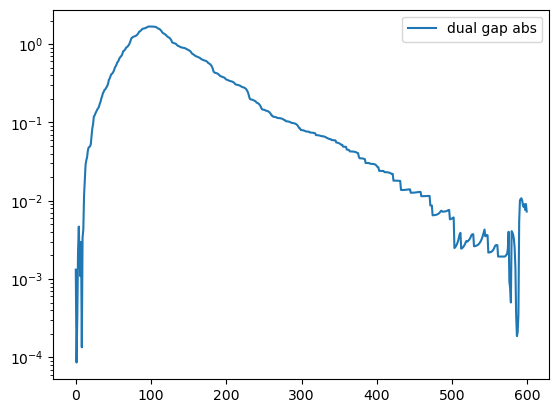

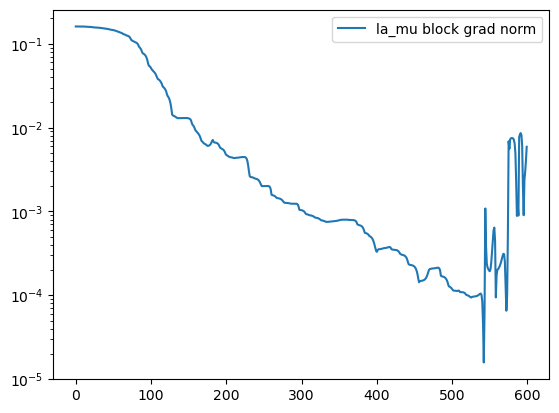

In [26]:
plt.plot(np.abs(results.history_dual_gap), label="dual gap abs")
plt.yscale("log")
plt.legend()
plt.show()


plt.plot(results.history_la_mu_grad_norm, label="la_mu block grad norm")
plt.yscale("log")
plt.legend()
plt.show()

# plt.plot(results.history_prime_values, label="history prime function")
# plt.legend()
# plt.show()

# plt.plot(results.history_dual_values, label="history dual function")
# plt.legend()
# plt.show()




In [10]:
flows_averaged

array([0.00774947, 0.01541233, 0.00777159, 0.0136761 , 0.01539017,
       0.02043796, 0.01921664, 0.01796821, 0.03260624, 0.01577748,
       0.03261606, 0.02465112, 0.01533335, 0.01369821, 0.02461423,
       0.03976776, 0.02174239, 0.0360767 , 0.03975299, 0.0214236 ,
       0.00195498, 0.03459138, 0.01538003, 0.00194142, 0.0410661 ,
       0.04137638, 0.04245172, 0.02719409, 0.062835  , 0.        ,
       0.01357483, 0.03944646, 0.02511619, 0.03511451, 0.0216642 ,
       0.02275025, 0.03040931, 0.03076789, 0.0302074 , 0.03254975,
       0.02634175, 0.01559317, 0.028419  , 0.02342876, 0.05430863,
       0.06053669, 0.03427144, 0.06464735, 0.06637276, 0.03124184,
       0.        , 0.0664189 , 0.05654641, 0.03639555, 0.0326883 ,
       0.03091185, 0.05310215, 0.05659268, 0.01272453, 0.03240076,
       0.01156438, 0.01077502, 0.01435656, 0.01069033, 0.03195041,
       0.03420944, 0.05977812, 0.01449306, 0.03219576, 0.01996258,
       0.01594142, 0.01958595, 0.01608111, 0.03028899, 0.03387

In [10]:
# расчет прямой функции
vars = np.zeros(oracle_stacker.parameters_vector_size)  # dual costs w
_ = oracle_stacker(vars)
print("prime function value: ", oracle_stacker.get_prime_value())

vars block grad:  0.0
t in optim params grad:  0.0 0.0
la in optim params grad:  26.219936940859927
mu in optim params grad:  26.261383907437413
norm T:  0.0
grad dF dla:  0.12239030463886905
grad dF dmu:  0.1221871790671455
prime function value:  19.05361456152633
